In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Paths to dataset

In [81]:
# Definition of paths
data_dir = os.path.join(os.getcwd(), '../Dataset')

raw_data_dir = os.path.join(data_dir, 'raw')
ids_mapping = os.path.join(raw_data_dir, 'IDS_mapping.csv')
diabetes_data = os.path.join(raw_data_dir, 'diabetic_data.csv')

mapping_data_dir = os.path.join(data_dir, 'Mapping')
os.makedirs(mapping_data_dir, exist_ok=True)

preprocessed_out_dir = os.path.join(data_dir, 'Preprocessed')
os.makedirs(preprocessed_out_dir, exist_ok=True)

admission_type_mapping_data = os.path.join(mapping_data_dir, 'admission_type_mapping.csv')
discharge_disposition_data = os.path.join(mapping_data_dir, 'discharge_disposition_mapping.csv')
admission_source_mapping_data = os.path.join(mapping_data_dir, 'admission_source_mapping.csv')

preprocessed_saved_filepath = os.path.join(preprocessed_out_dir, 'preprocessed.pkl')

In [82]:
df = pd.read_pickle(preprocessed_saved_filepath)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69987 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              69987 non-null  int64   
 1   patient_nbr               69987 non-null  int64   
 2   race                      69987 non-null  category
 3   gender                    69987 non-null  object  
 4   age                       69987 non-null  object  
 5   admission_type_id         69987 non-null  category
 6   discharge_disposition_id  69987 non-null  category
 7   admission_source_id       69987 non-null  category
 8   time_in_hospital          69987 non-null  int64   
 9   medical_specialty         69987 non-null  category
 10  num_lab_procedures        69987 non-null  int64   
 11  num_procedures            69987 non-null  int64   
 12  num_medications           69987 non-null  int64   
 13  number_outpatient         69987 non-null  int64   

In [ ]:
# Groups the DataFrame by the specified column and readmitted status. Counts the number of occurrences for each combination, filling missing values with zero.
# Converts the grouped data into a format suitable for plotting (one column per readmitted status).
# Plots a bar chart with separate colors for each readmitted status.
def plot_bar_chart(df, column, xlabel):
    filtered_df = df.groupby([column, 'readmitted'], observed=False).size().unstack(fill_value=0)
    filtered_df.plot(kind='bar', stacked=False, figsize=(12, 8))
    plt.xlabel(xlabel)
    plt.ylabel('Number of Patients')
    plt.title(f'Bar Chart of Readmitted vs Not Readmitted Patients by {xlabel}')
    plt.legend(['Not Readmitted', 'Readmitted'])
    plt.show()

## Readmissions based on Age ##

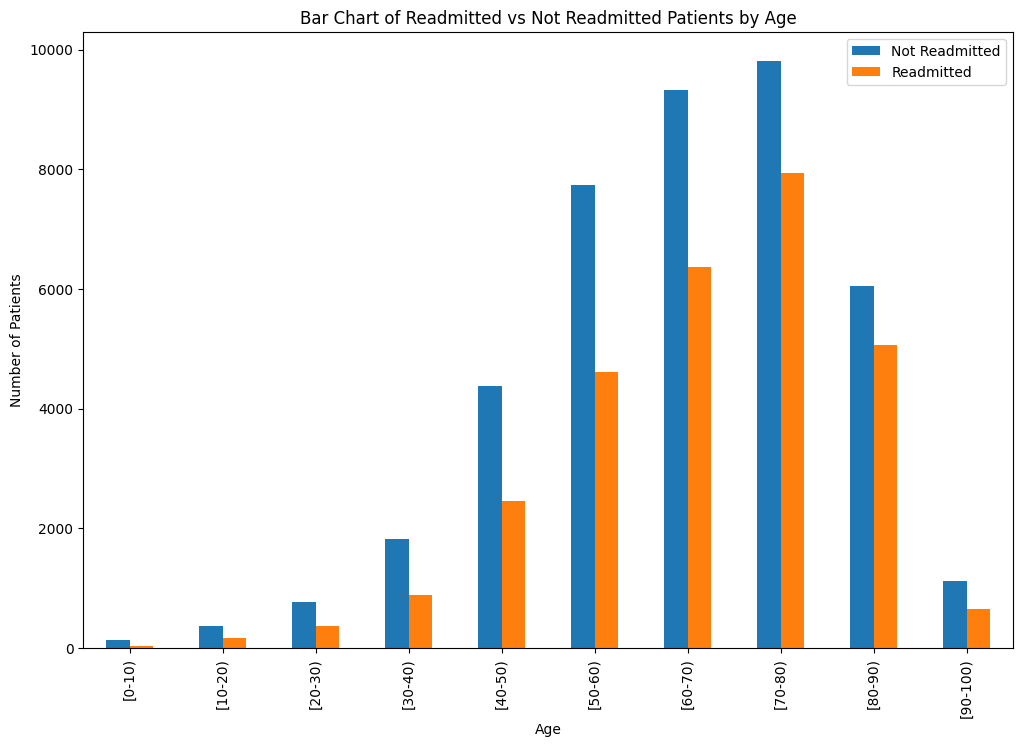

In [85]:
plot_bar_chart(df, 'age', 'Age')

## Re-admissions based on Discharge Disposition ID ##

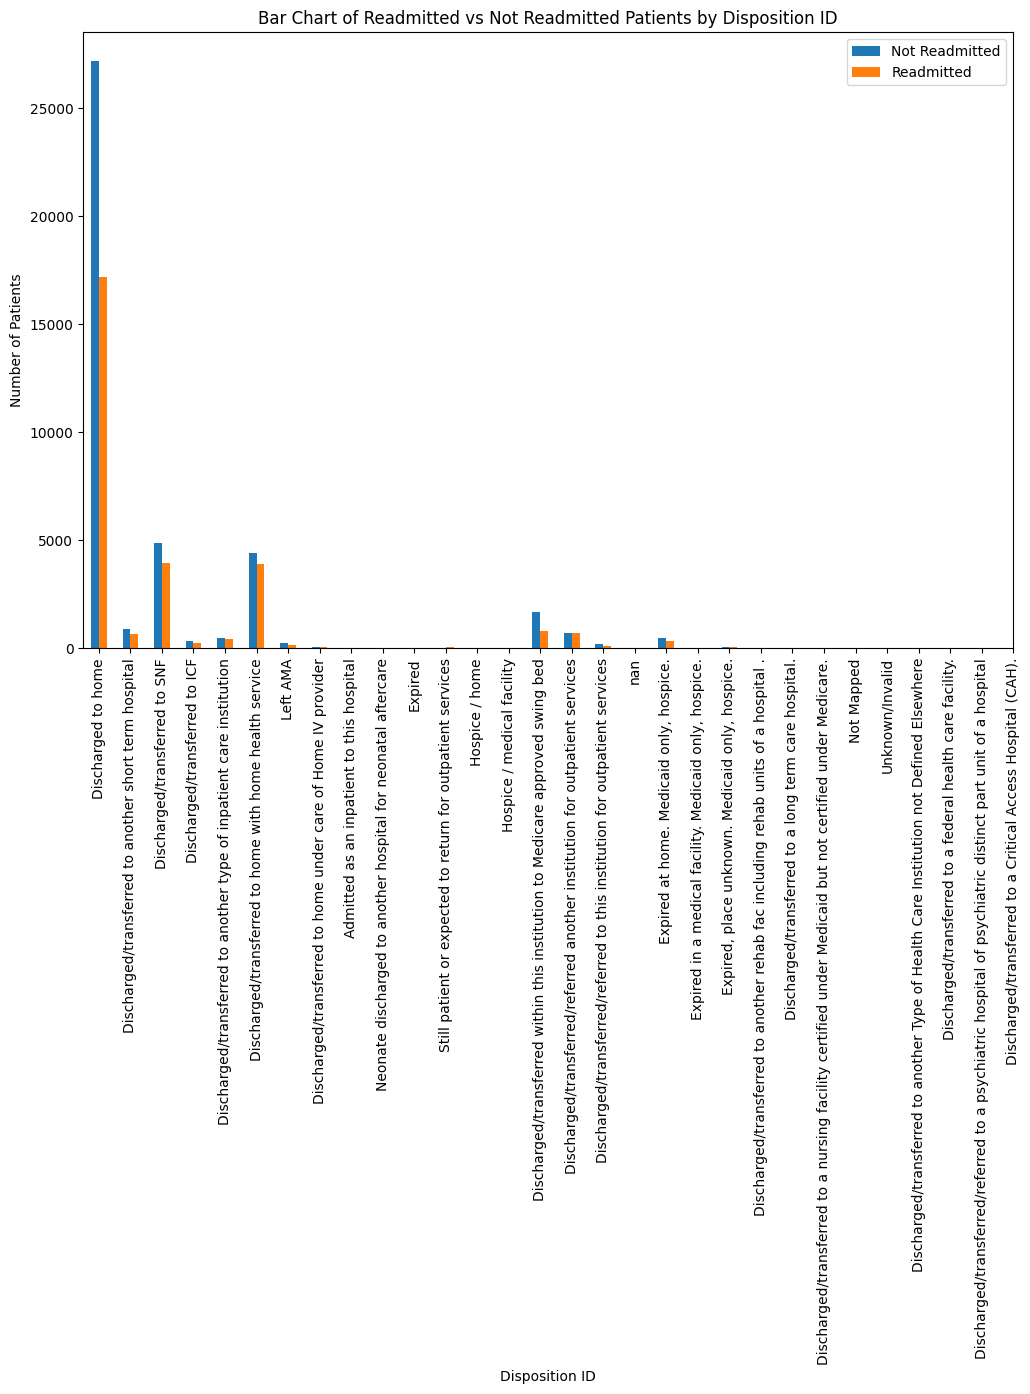

In [86]:
# Plot count of patients with readmissions vs disposition id
disposition_readmitted_counts = df.groupby(['discharge_disposition_id', 'readmitted'], observed=True).size().unstack(fill_value=0)
# remove all the disposition ids that have zero counts for both readmitted and not readmitted patients
disposition_readmitted_counts = disposition_readmitted_counts.loc[(disposition_readmitted_counts != 0).any(axis=1)]

disposition_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8))
# before plotting, we need to replace the disposition id with the actual description
discharge_disposition_df = pd.read_csv(discharge_disposition_data)
disposition_id_mapping = discharge_disposition_df.set_index('discharge_disposition_id').to_dict()['description']
plt.xticks(range(len(disposition_id_mapping)), disposition_id_mapping.values(), rotation=90)
plt.xlabel('Disposition ID')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Disposition ID')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Race ##

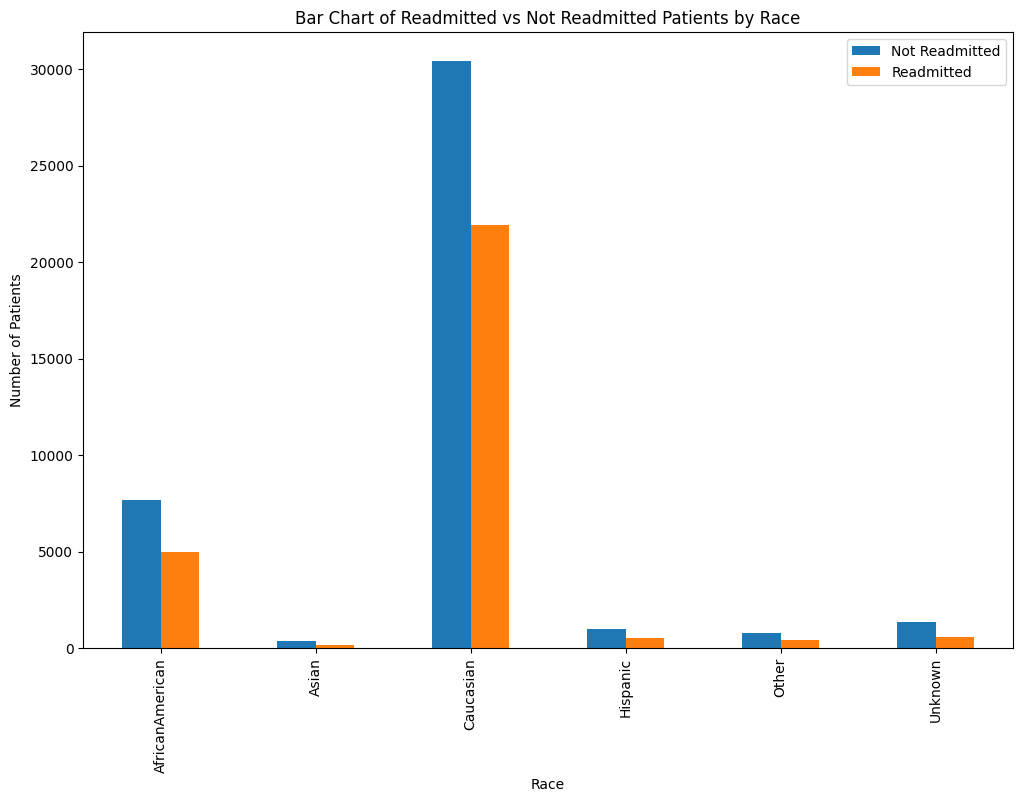

In [87]:
# plot readmission counts vs race
plot_bar_chart(df, 'race', 'Race')

## Re-admissions based on Gender ##

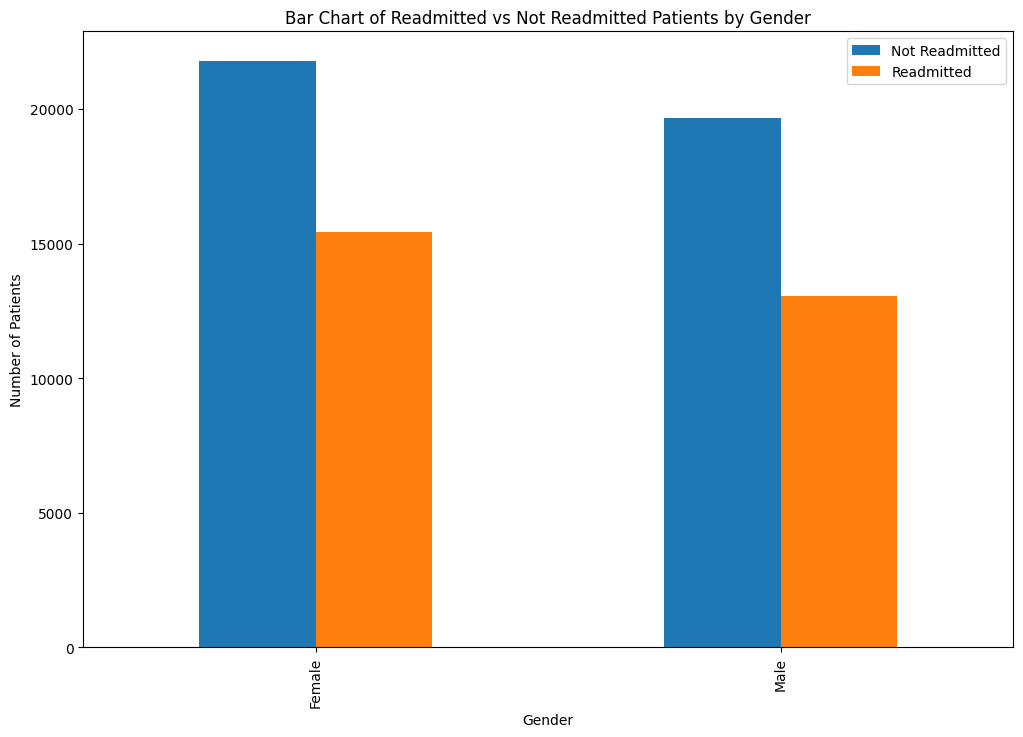

In [88]:
# plot readmission counts vs gender
plot_bar_chart(df, 'gender', 'Gender')

## Re-admissions based on Number of Procedures ##

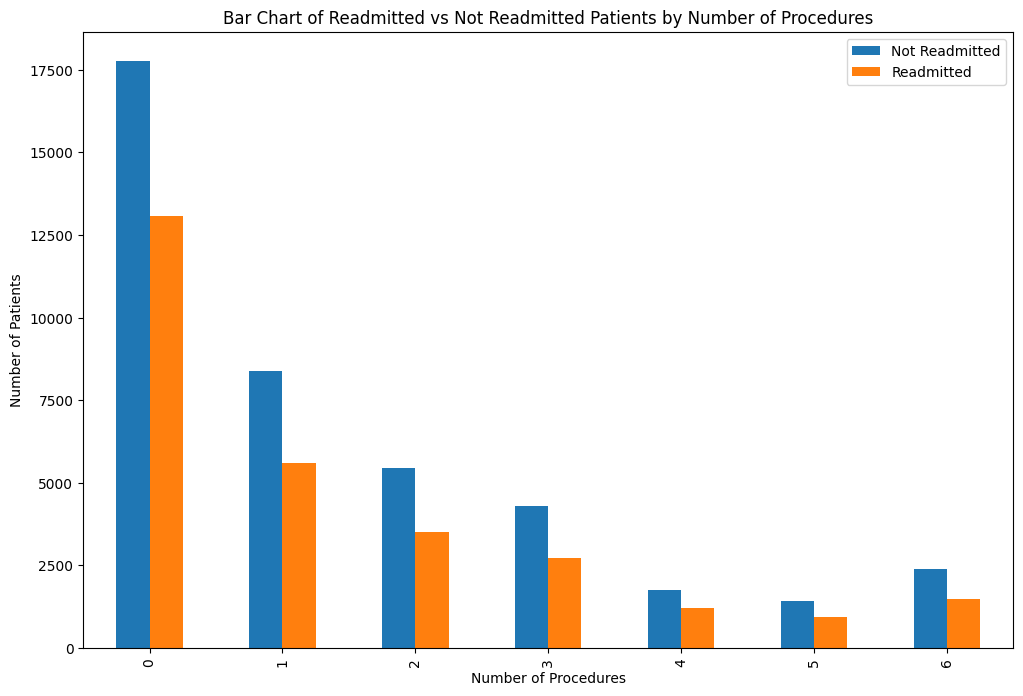

In [89]:
# plot readmission counts vs number of procedures
plot_bar_chart(df, 'num_procedures', 'Number of Procedures')

## Re-admissions based on number of medications ##

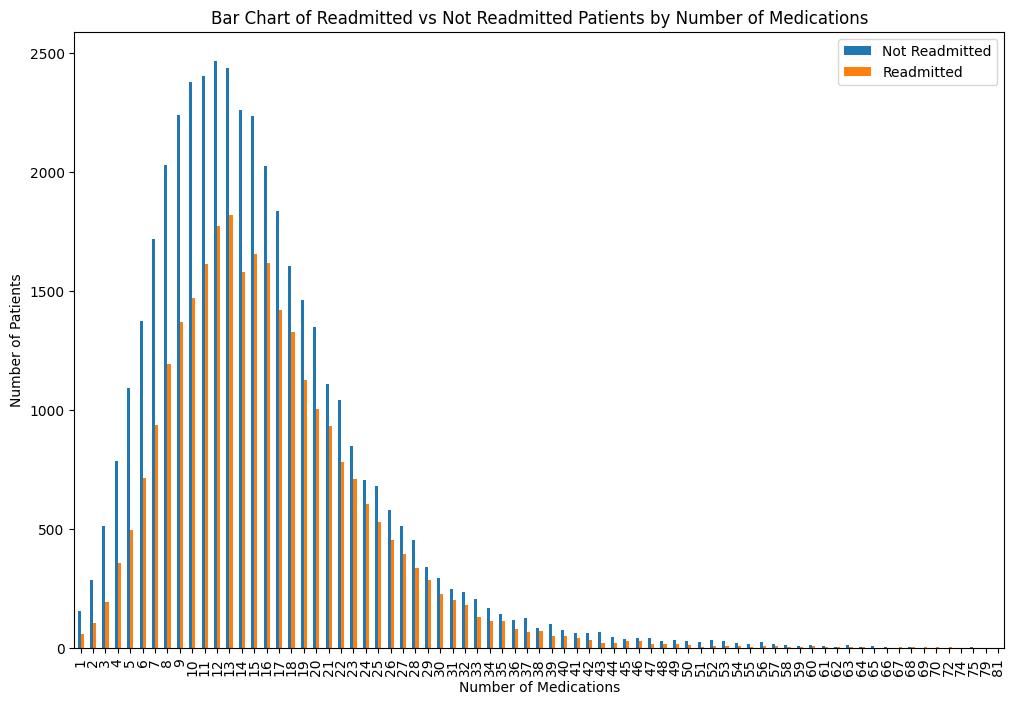

In [90]:
# plot readmission counts vs number of medications
plot_bar_chart(df, 'num_medications', 'Number of Medications')

\## Re-admissions based on Number of Outpatients ##

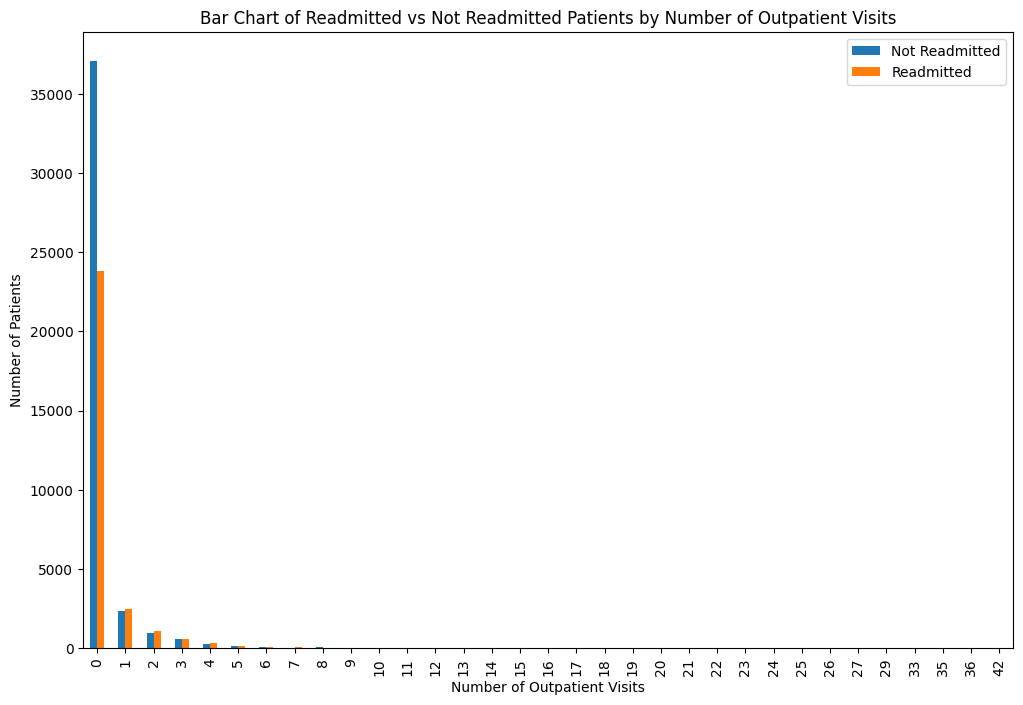

In [91]:
# plot readmission counts vs number of outpatient visits
plot_bar_chart(df, 'number_outpatient', 'Number of Outpatient Visits')

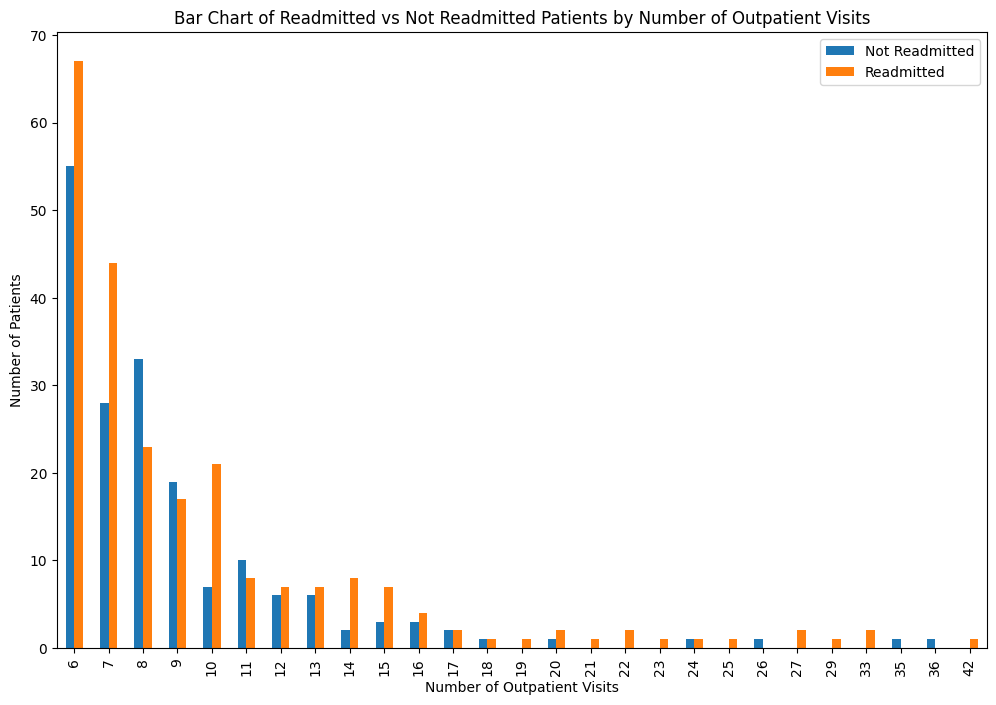

In [92]:
plot_bar_chart(df[df['number_outpatient'] > 5], 'number_outpatient', 'Number of Outpatient Visits')

## Re-admissions based on Number of Inpatients ##

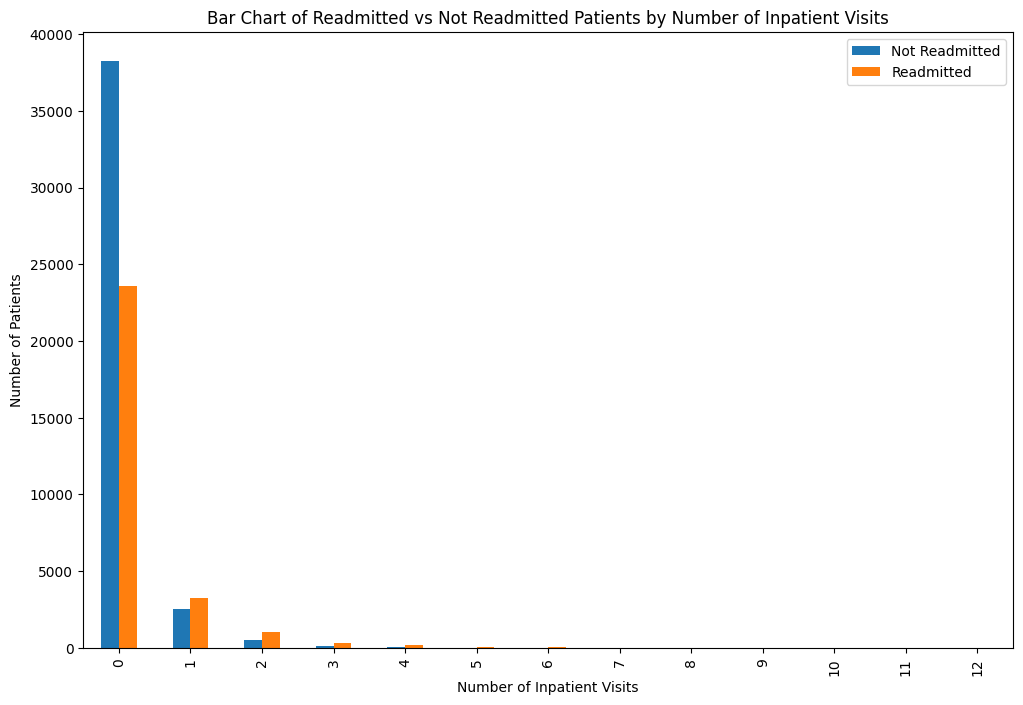

In [93]:
# plot readmission counts vs number of inpatient visits
plot_bar_chart(df, 'number_inpatient', 'Number of Inpatient Visits')

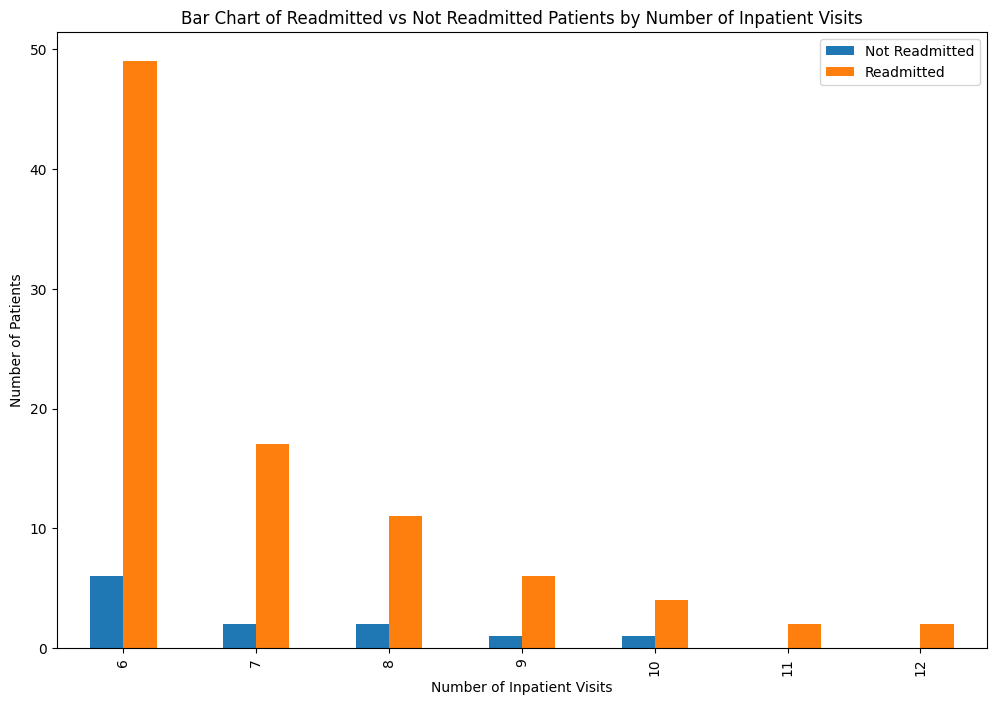

In [94]:
plot_bar_chart(df[df['number_inpatient'] > 5], 'number_inpatient', 'Number of Inpatient Visits')

# Re-admissions based on Number of lab procedures

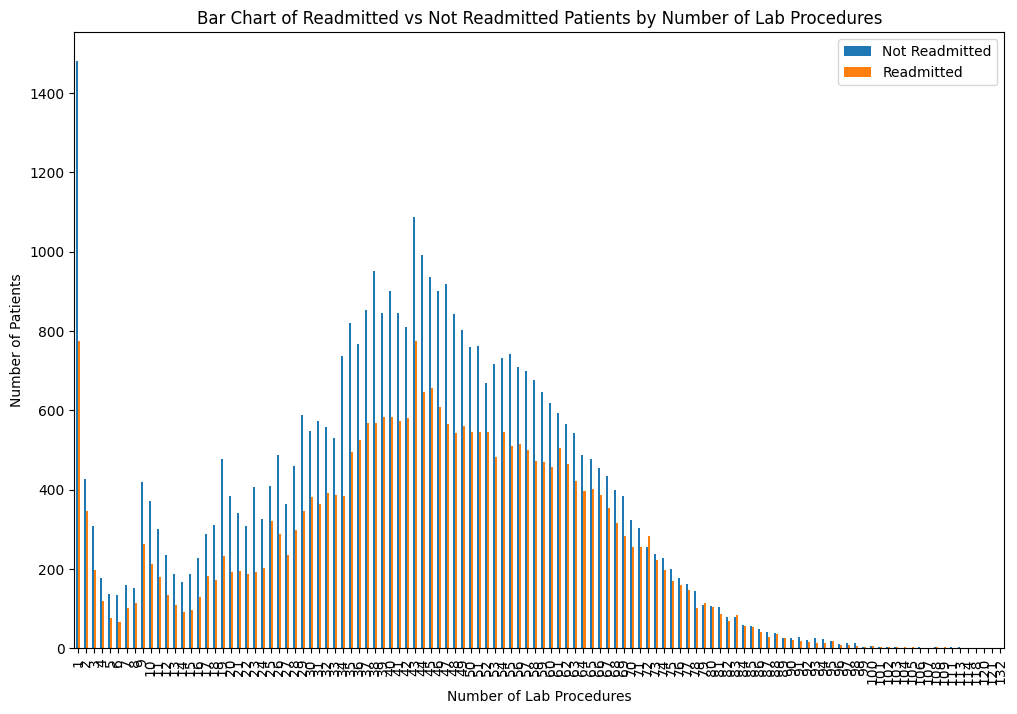

In [95]:
# plot readmission counts vs number of lab procedures
plot_bar_chart(df, 'num_lab_procedures', 'Number of Lab Procedures')

## Re-admissions based on diagnosis ##

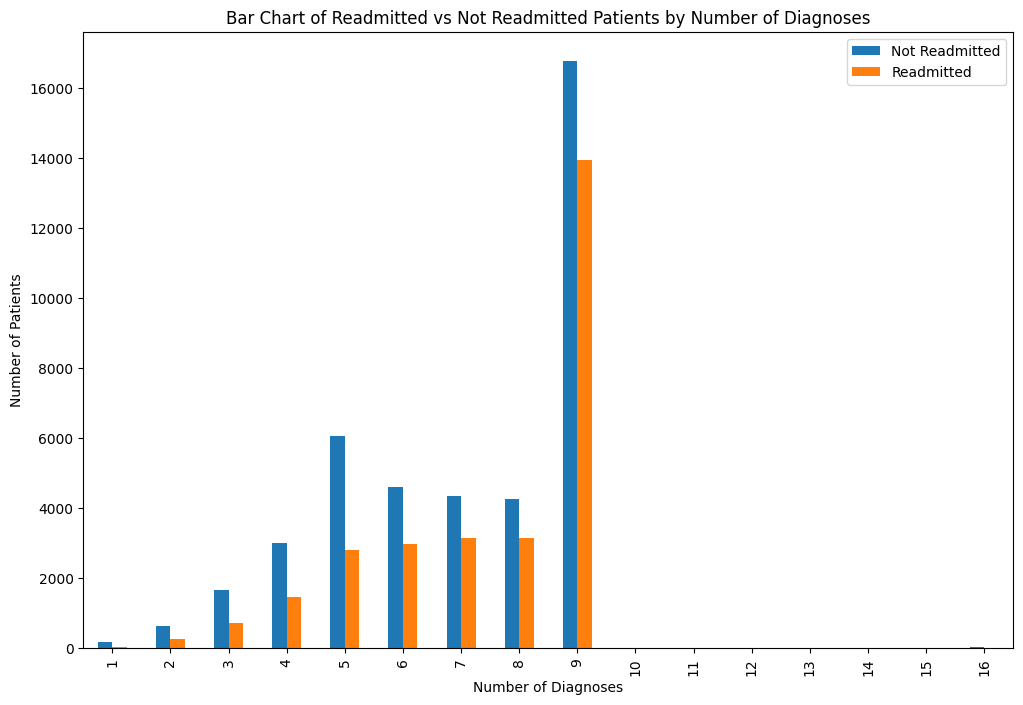

In [96]:
# plot readmission counts vs number of diagnoses
plot_bar_chart(df, 'number_diagnoses', 'Number of Diagnoses')

- **Majority of Patients with 9 Diagnoses:** The chart shows that the highest number of patients, both readmitted and not readmitted, fall into the category with 9 diagnoses. This suggests that many patients in this dataset have a complex medical profile, requiring multiple diagnoses to capture their health status.
- **Higher Readmission Rate with Increased Diagnoses:** There is a noticeable trend of increased readmission as the number of diagnoses rises. This pattern suggests that patients with a higher number of diagnoses may have more severe or chronic conditions, leading to a greater likelihood of readmission.
- **Readmission Consistency Across Lower Diagnosis Counts:** For patients with fewer diagnoses (1-8), the number of readmitted and not readmitted patients is relatively balanced, although readmitted counts tend to increase slightly as the diagnosis count rises.
- **Potential Threshold at 9 Diagnoses:** The sharp increase in both total patients and readmission rates at 9 diagnoses may serve as an indicator of high-risk patients. Patients with this many diagnoses might benefit from targeted post-discharge support to reduce their readmission rates.
- **Implications for Care Management:** Patients with numerous diagnoses are likely to have complex medical needs. These patients could benefit from specialized care coordination and follow-up after discharge to help manage their conditions and prevent readmission.

This chart highlights that patients with a high number of diagnoses, especially around 9, are at greater risk of readmission, indicating that diagnosis count could be an important factor in identifying high-risk patients. This insight could guide healthcare providers in prioritizing follow-up care for these patients.

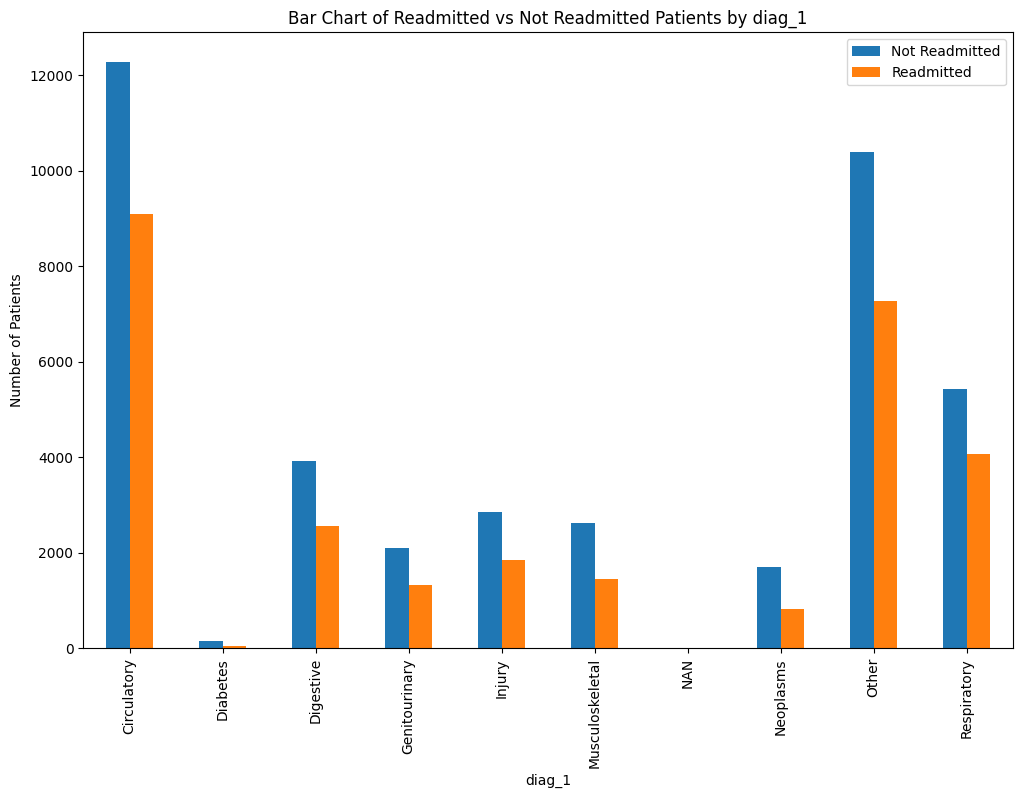

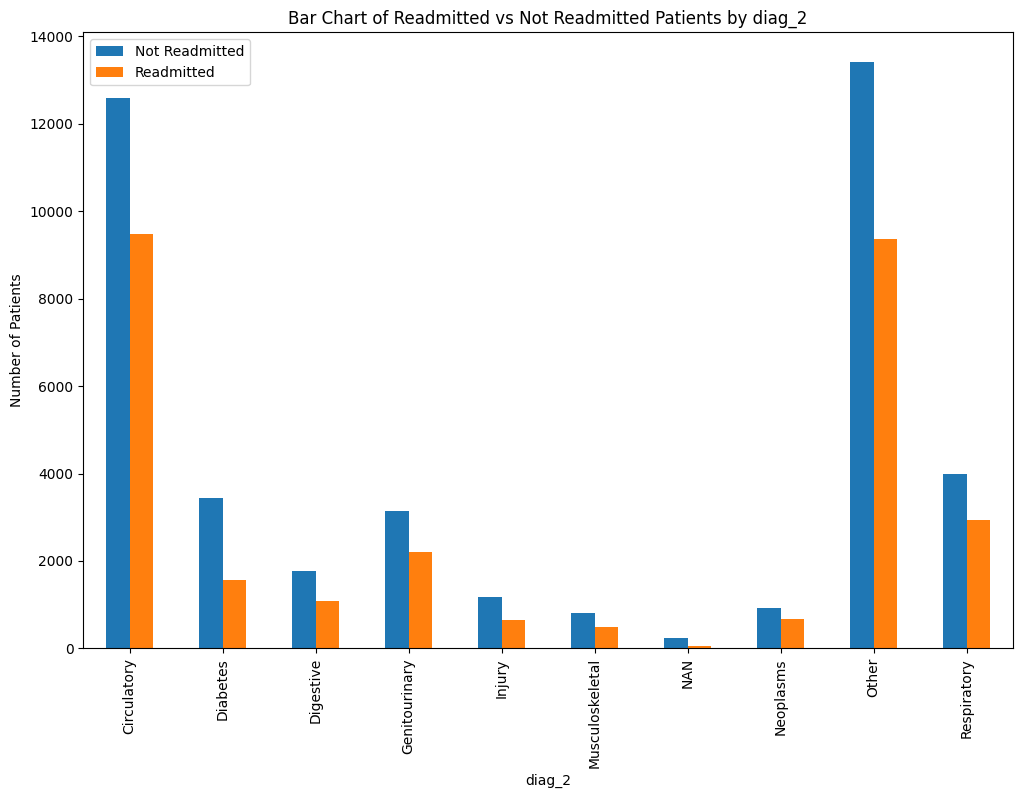

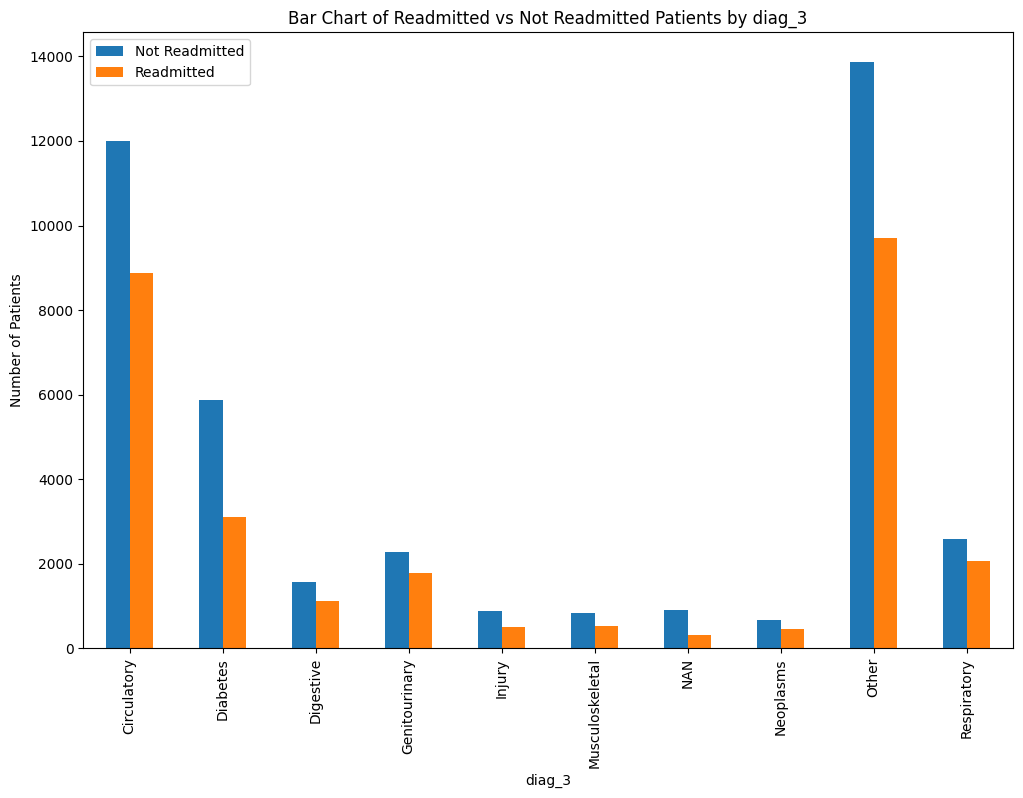

In [97]:
# plot readmission counts vs diagnosis
diag_list = ['diag_1','diag_2','diag_3']
for diag_col in diag_list:
    plot_bar_chart(df, diag_col, diag_col)

- **High Readmission for Circulatory and Diabetes Diagnoses:** The chart shows a substantial number of readmitted patients in the "Circulatory" and "Diabetes" categories. This suggests that patients with circulatory or diabetic issues are more prone to readmission, likely due to the chronic and potentially unstable nature of these conditions.
- **Dominance of "Other" Category:** The "Other" category has the highest number of patients, both readmitted and not readmitted, indicating that many diagnoses fall outside the primary categories. However, the higher count of not readmitted patients suggests that these cases may be less critical in terms of readmission risk.
- **Significant Readmission Rates in Respiratory Diagnoses:** Patients with respiratory issues also show considerable readmission rates. Respiratory problems can be recurrent and require ongoing management, which might contribute to higher readmission rates.
- **Lower Readmission in Categories like Digestive and Genitourinary:** The "Digestive" and "Genitourinary" categories show lower readmission rates compared to others, indicating that these conditions might be less likely to lead to readmission or could be more manageable with treatment.
- **Insight for Targeted Interventions:** Patients with circulatory, diabetes, and respiratory diagnoses appear to have higher readmission rates, highlighting these categories as potential targets for post-discharge interventions. Enhanced follow-up and management plans for these conditions could help reduce readmission rates.

This chart suggests that patients with circulatory, diabetes, and respiratory diagnoses are at a higher risk of readmission, while patients with conditions in other categories are less likely to return. This insight could be useful for healthcare providers to prioritize follow-up care for high-risk conditions.

## Re-admissions based on Max Glu Serum ##

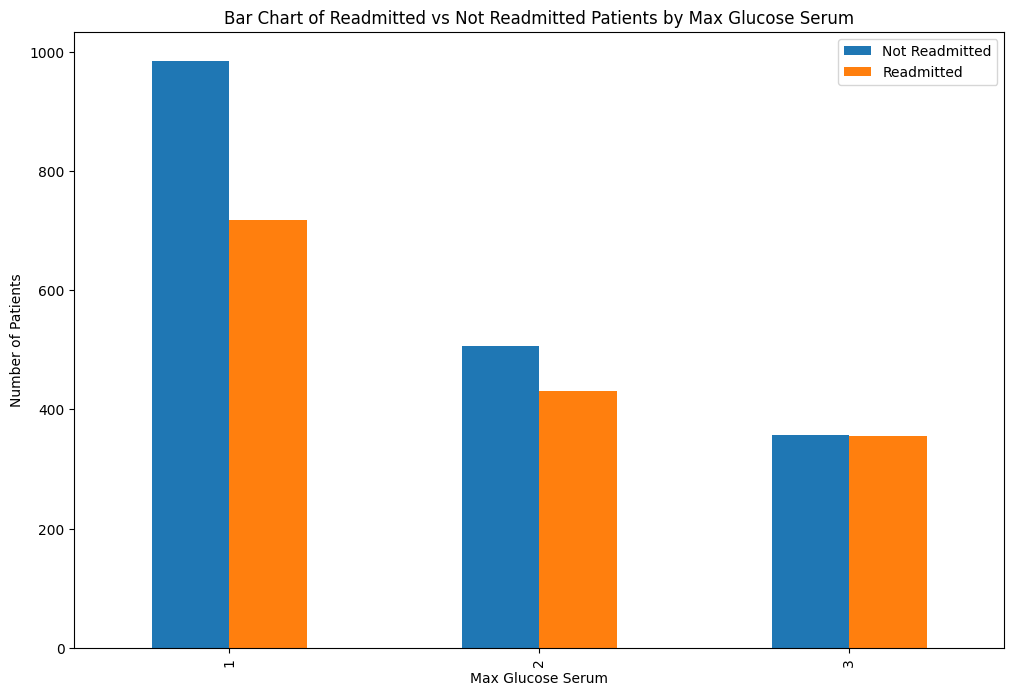

In [98]:
# plot readmissions vs max glucose serum test results
plot_bar_chart(df[df['max_glu_serum_measured'] == 'Yes'], 'max_glu_serum', 'Max Glucose Serum')

- **Higher Readmission for Elevated Glucose Levels:** The categories 2 (`>200`) and 3 (`>300`) (indicating high glucose levels) have a noticeable number of readmitted patients (red), suggesting that patients with elevated glucose levels are more likely to be readmitted. This is consistent with the understanding that uncontrolled blood sugar levels can lead to complications, especially in diabetic patients.
- **Majority with Normal Glucose Levels:** The largest group falls under the category 1 (`Norm`), with a significantly higher count of not readmitted patients (blue) compared to readmitted patients. This indicates that patients with normal glucose levels have a lower likelihood of being readmitted, as stable glucose levels are often associated with better-managed health.
- **Slightly Higher Readmission Rate for Patients with >200 Glucose Level:** Among patients with glucose levels `>200`, there is a relatively balanced split between readmitted and not readmitted patients, showing a higher readmission risk than for patients in the "Norm" category. This suggests that while moderately elevated glucose can still be managed, it does increase the risk of complications leading to readmission.
- **Implications for Diabetic Management:** This data reinforces the importance of glucose control in reducing hospital readmissions. Patients with elevated glucose levels might benefit from closer monitoring and intervention to manage blood sugar levels post-discharge.
- **Potential for Targeted Follow-Up:** Patients with high glucose levels (especially those >200) could benefit from targeted follow-up care, diabetes management programs, or personalized support to help stabilize glucose levels and reduce the risk of readmission.

The chart indicates that elevated glucose levels are associated with a higher risk of readmission, while patients with normal glucose levels have a reduced likelihood of returning. This suggests an opportunity for healthcare providers to focus on glucose management for high-risk patients to prevent readmission.

## Re-admissions based on HbA1C result ##

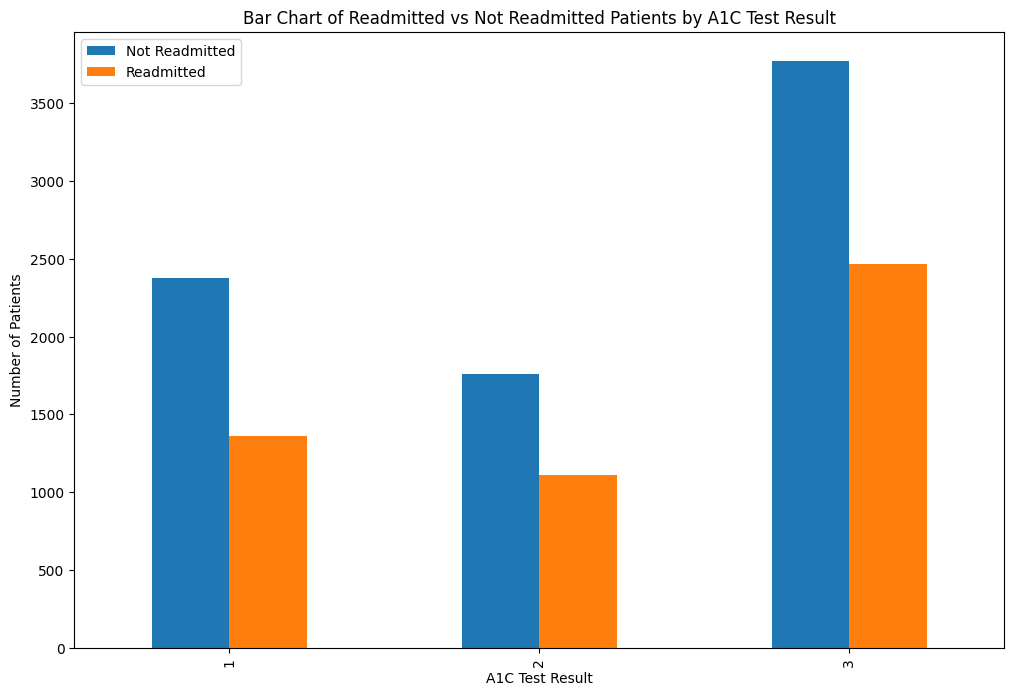

In [99]:
# plot readmissions vs A1C test results
plot_bar_chart(df[df['A1Cresult_measured'] == 'Yes'], 'A1Cresult', 'A1C Test Result')

- **Higher Readmission Rates for Elevated A1C Levels:** Patients with A1C test results in the `>8` (category 3) show a significant number of readmitted cases (red), suggesting that patients with poorly controlled blood sugar (indicated by high A1C) are at a greater risk of readmission. This aligns with clinical expectations, as high A1C levels often indicate long-term blood sugar management issues.
- **Balanced Readmission in >7 Category:** For patients with A1C levels `>7` (category 2), the readmitted and not readmitted counts are closer, but there is still a considerable readmission presence. This indicates that moderately elevated A1C levels can still be a risk factor for readmission, though not as strongly as very high levels (`>8`).
- **Lower Readmission for Normal A1C Levels:** Patients with normal A1C levels ("Norm") show fewer readmissions compared to those with elevated levels. This suggests that patients with well-controlled blood sugar levels are less likely to return to the hospital, emphasizing the importance of maintaining A1C within a normal range.
- **Importance of A1C as a Readmission Indicator:** The chart highlights A1C as a strong indicator of readmission risk, especially for patients with levels above 8. Monitoring and controlling A1C levels in diabetic patients may be crucial for reducing hospital readmissions.
- **Potential for Post-Discharge Support:** Patients with high A1C levels (`>8`) may benefit from targeted interventions, such as diabetes education, medication adjustments, or dietary support, to help manage their condition and prevent readmission.

The chart suggests that elevated A1C levels are associated with a higher likelihood of readmission, while patients with normal A1C levels have a reduced risk. This insight can help healthcare providers identify high-risk patients and offer focused post-discharge care to improve outcomes.



## Re-admissions based on Change ##

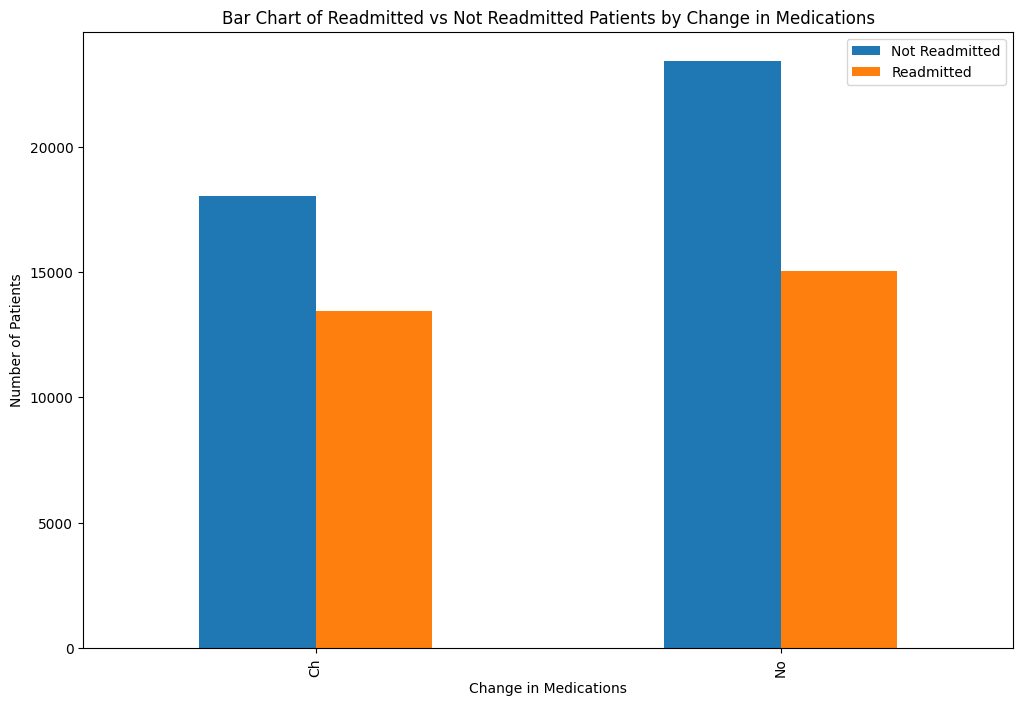

In [100]:
# plot re-admissions vs change in medications
plot_bar_chart(df, 'change', 'Change in Medications')

- **Slightly Higher Readmission with Medication Changes:** The chart shows a higher number of readmitted patients in both the "Ch" and "No" categories, with a slight increase in readmissions for patients with a change in medications ("Ch"). This suggests that changes in medication regimens may contribute to readmission risk, possibly due to the challenges patients face when adjusting to new medications or dosages.
- **Consistent Pattern Across Both Categories:** Both categories ("Ch" and "No") have a substantial number of readmitted and not readmitted patients, indicating that while medication changes may have some impact, it is not a dominant factor alone in determining readmission likelihood.
- **Potential Indicator of Health Complexity:** The presence of a change in medications could be associated with more complex or deteriorating health conditions, which might require adjustments in treatment. These patients may benefit from closer follow-up to monitor the effectiveness of the new medication and address any side effects.
- **Opportunity for Targeted Support:** Patients who experience changes in their medication regimens may need additional support, such as medication counseling, to help them understand and adhere to their new treatment plans. This could potentially reduce the risk of readmission by ensuring patients are better equipped to manage changes.
- **Comparative Readmission Risk:** While both groups show readmissions, the "Ch" category indicates a marginally higher risk. This insight could guide healthcare providers to flag patients with recent medication changes as needing more intensive post-discharge support.

The chart suggests that patients who undergo a change in medications may have a slightly higher likelihood of readmission, possibly due to the complexity of their health conditions or challenges in adapting to new medications. This insight could inform healthcare providers to focus on post-discharge support for patients with recent medication adjustments.


## Re-admission based on time in hospital ##

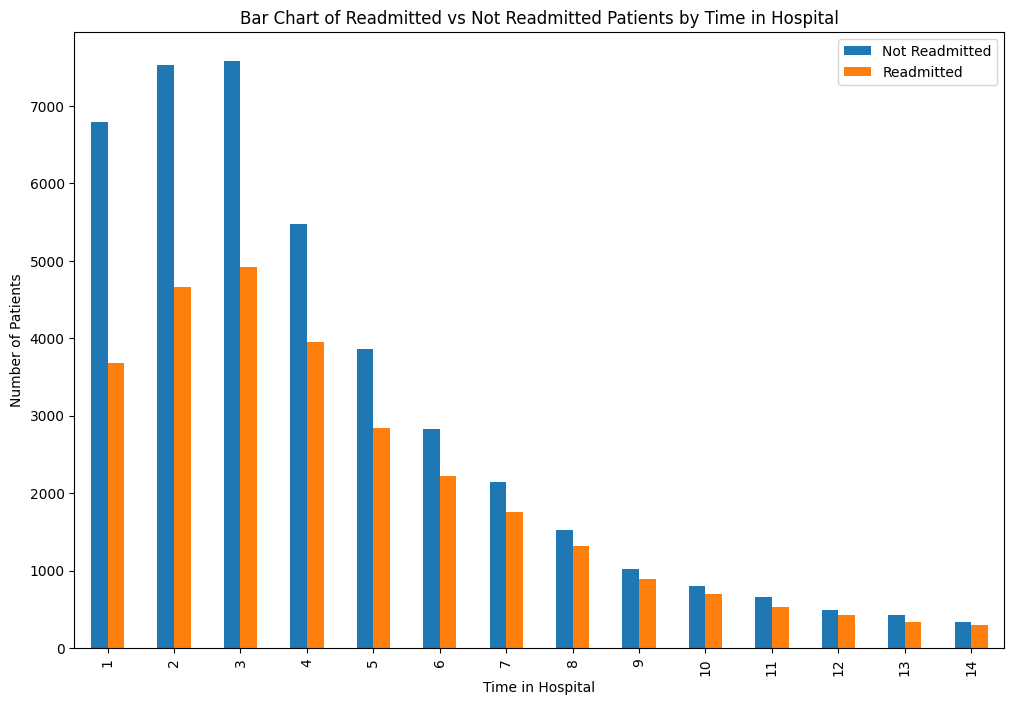

In [101]:
# plot based on re-admissions vs time in hospital
plot_bar_chart(df, 'time_in_hospital', 'Time in Hospital')

- **Higher Readmission Rates with Shorter Hospital Stays:** The chart shows that shorter hospital stays (1-4 days) have a higher number of readmitted patients, suggesting that patients discharged after a brief hospital stay are more likely to return. This could imply that these patients may have been discharged too soon or were not fully stabilized before leaving the hospital.
- **Declining Readmission with Longer Stays:** As the length of hospital stay increases, the number of both readmitted and not readmitted patients decreases. Patients with longer stays (10+ days) show a lower count of readmissions, which might indicate that these patients received more comprehensive treatment or were better monitored during their stay, reducing their need for readmission.
- **Peak Readmission for 2-4 Days:** The highest readmission counts occur for patients with hospital stays of 2 to 4 days. This period might be too short to fully address complex health issues, potentially leading to incomplete recovery and an increased risk of readmission.
- **Implications for Discharge Planning:** Patients with shorter hospital stays might benefit from enhanced discharge planning, follow-up appointments, or additional resources to support their recovery at home. Monitoring these patients closely after discharge could help reduce readmission rates.
- **Balanced Readmission for Longer Stays:** For patients with stays longer than 7 days, the bars are more balanced, indicating that the likelihood of readmission is lower and similar to not readmitted patients. This suggests that longer hospital stays could allow for better stabilization and treatment of conditions, reducing the risk of return.

The chart suggests that patients with shorter hospital stays, particularly between 1 and 4 days, are at a higher risk of readmission. This insight can help healthcare providers identify patients who might benefit from more thorough discharge planning and post-discharge follow-up to ensure a smooth recovery.


## Re-admission based on diabetes medications ##

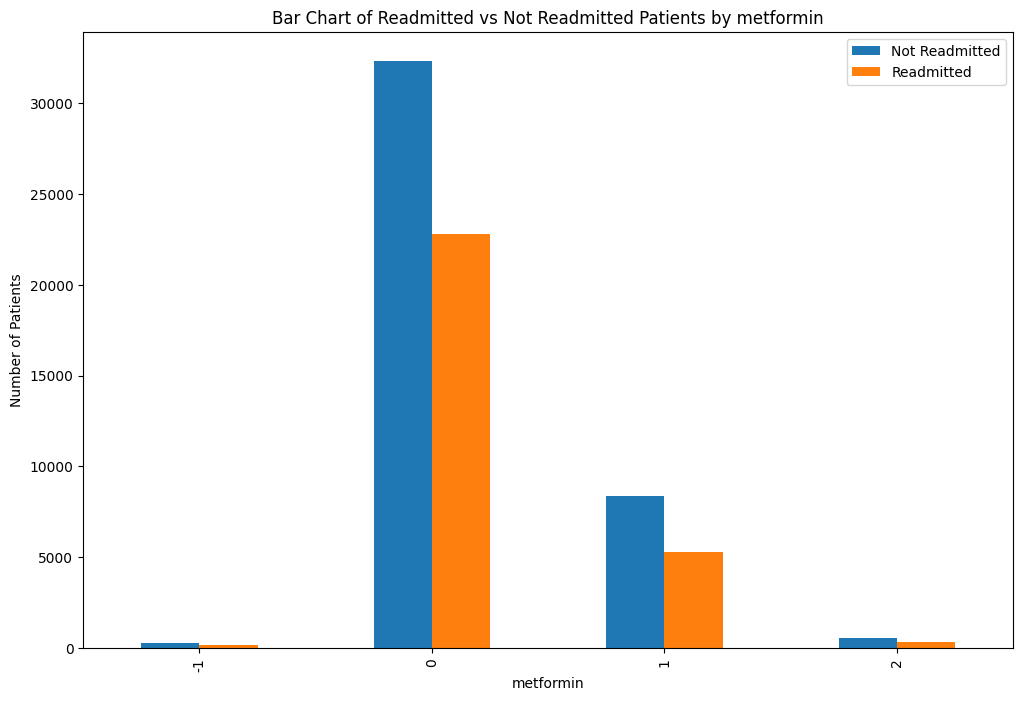

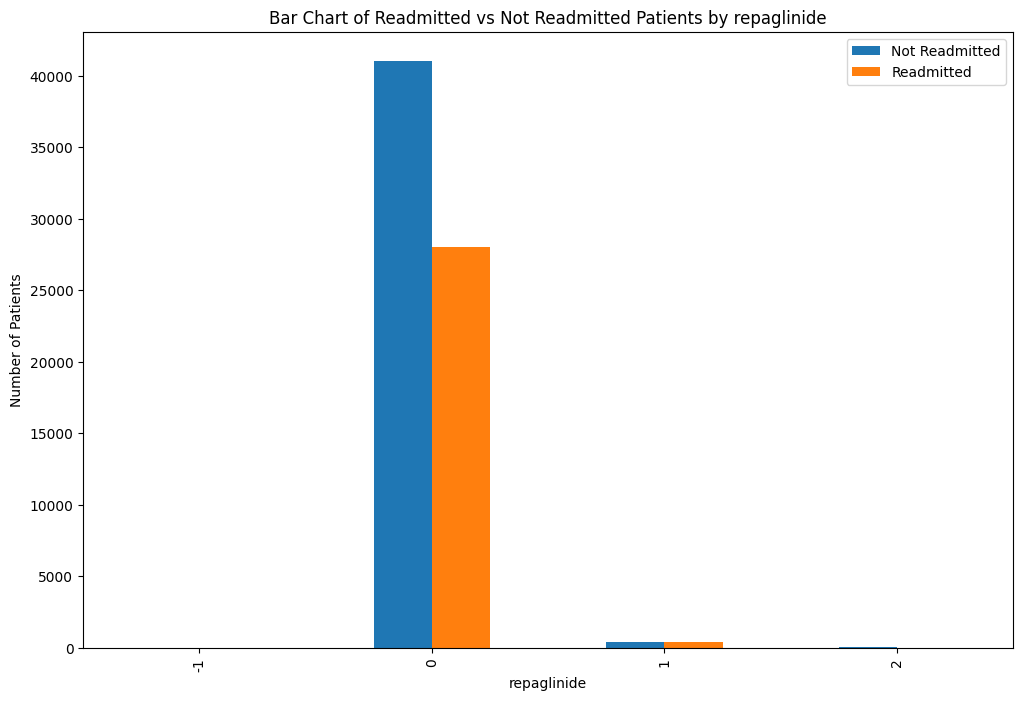

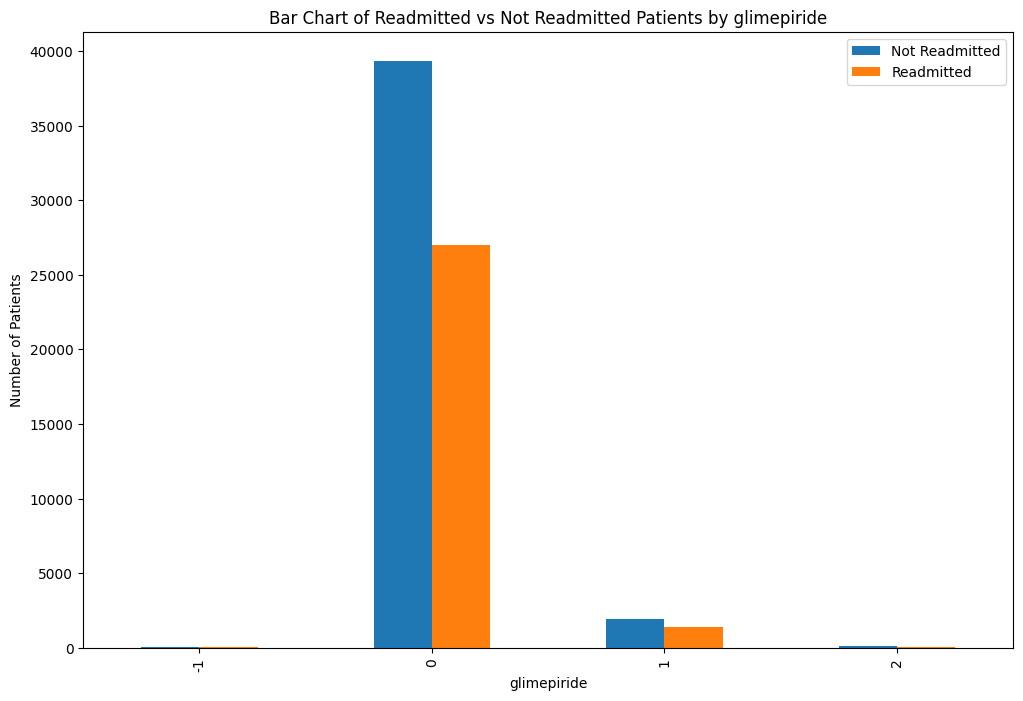

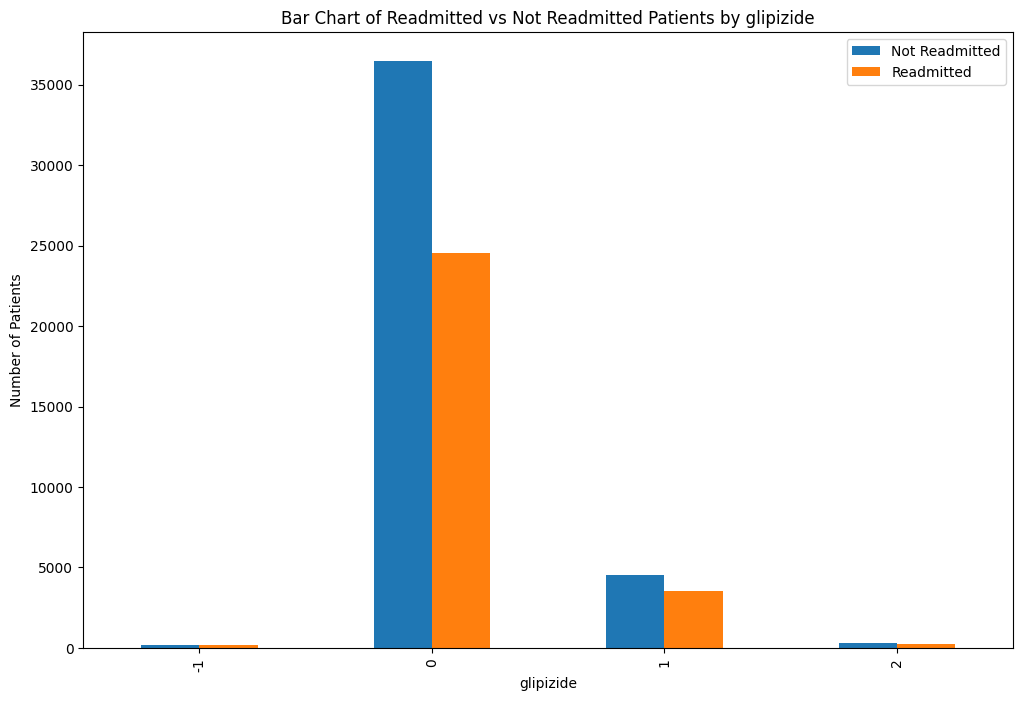

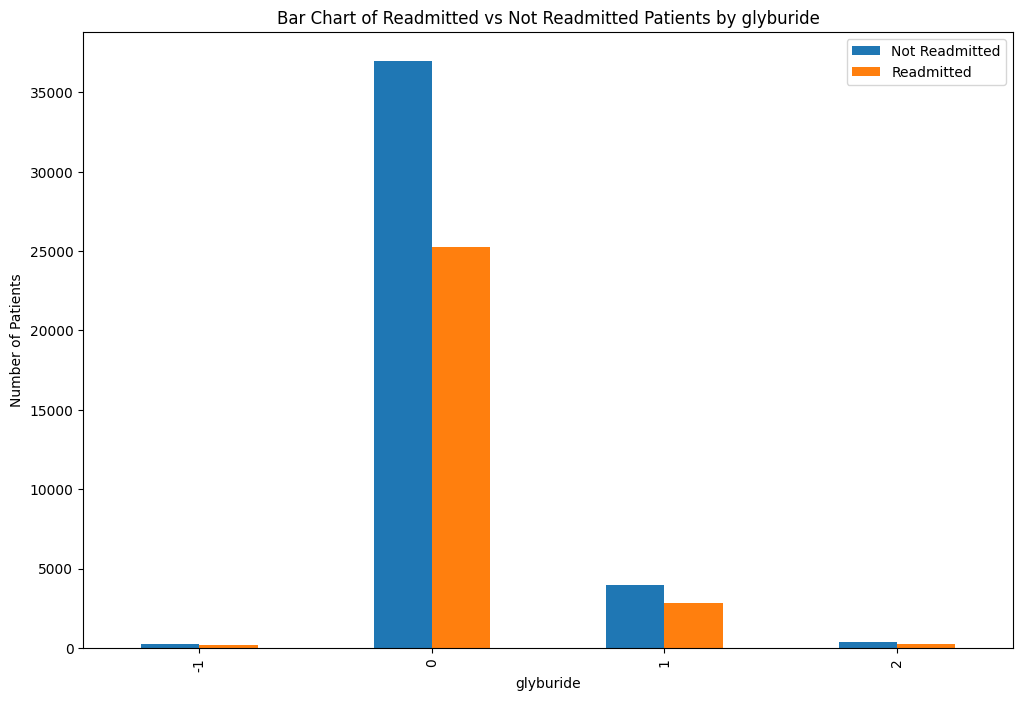

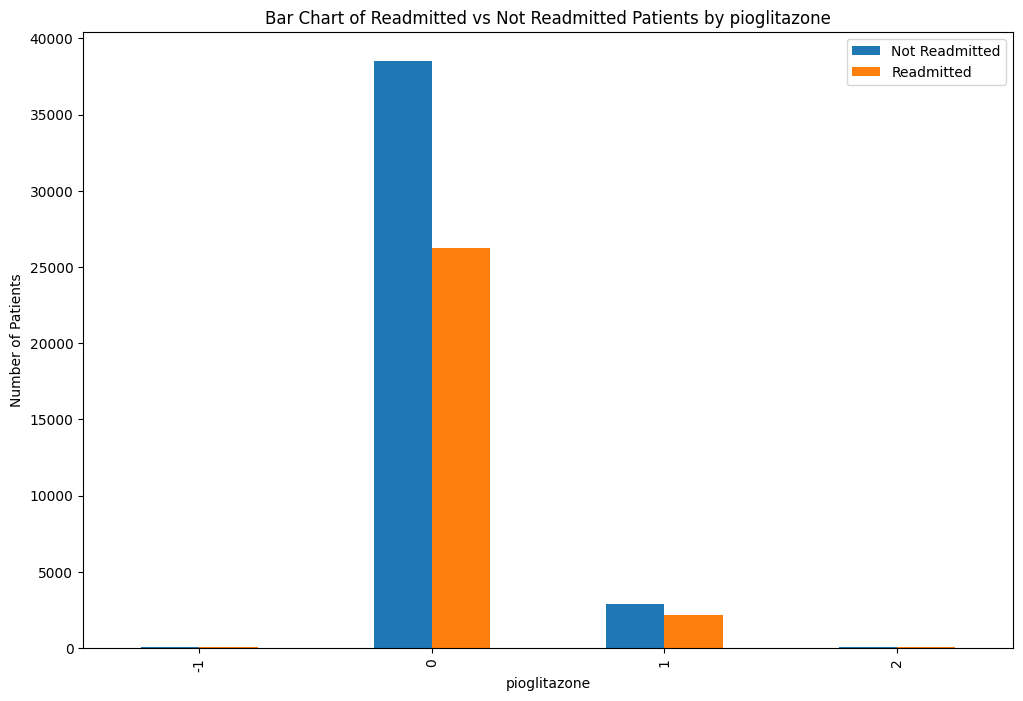

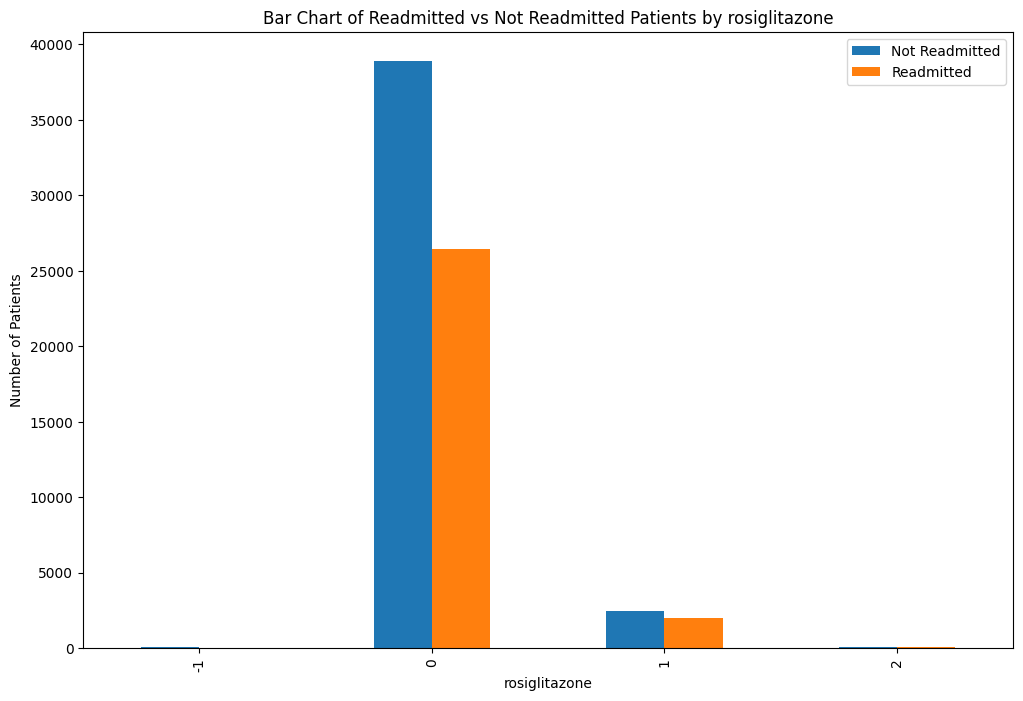

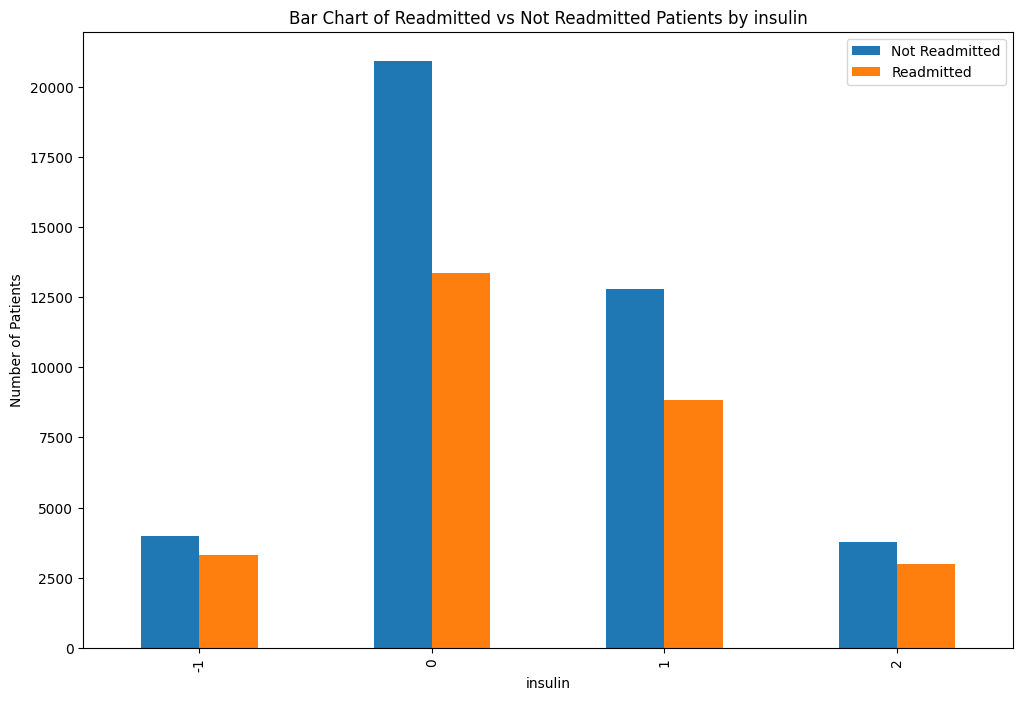

In [102]:
# get the medicine columns that are not dropped
medicine_columns = ['metformin', 'repaglinide', 'glimepiride',
                    'glipizide', 'glyburide', 'pioglitazone',
                    'rosiglitazone', 'insulin',]

for medicine in medicine_columns:
    plot_bar_chart(df, medicine, medicine)

## Re-admissions based on number of emergency visits ##

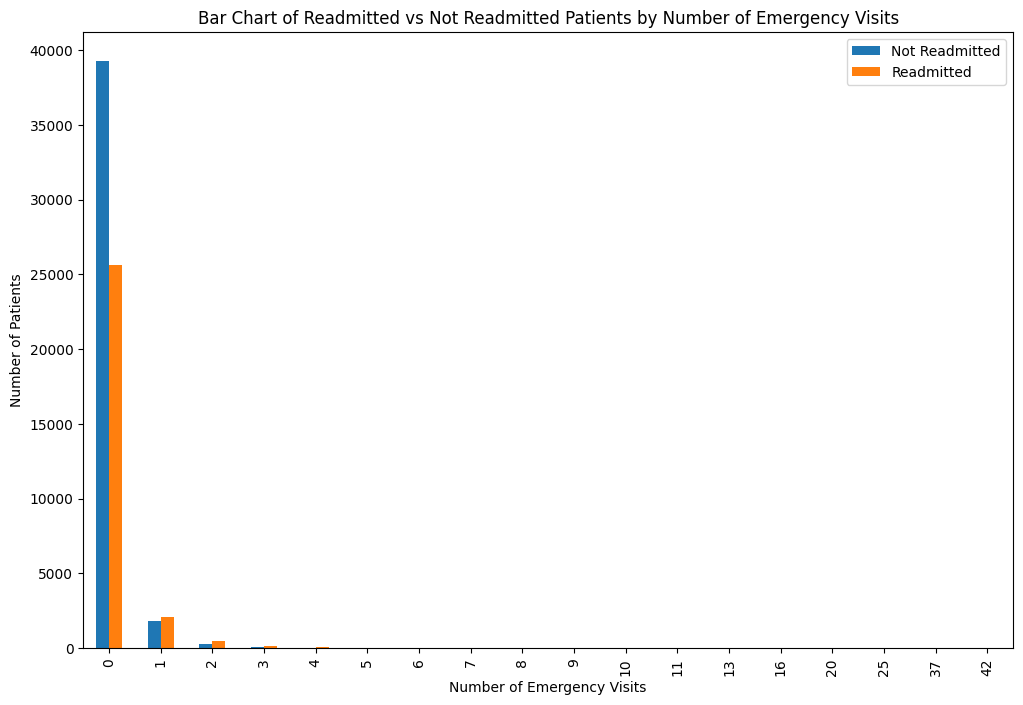

In [103]:
# plot re-admissions vs the number of emergency visits
plot_bar_chart(df, 'number_emergency', 'Number of Emergency Visits')